Workshop 1

Question 1:


In [61]:

import math
def f3(w1,w2,w3):
  lam = 1
  result = (
        0.5 *lam*(w1 * w1 + w2 * w2 + w3 * w3) +
        math.log(1 + math.exp(-(w1 + w2 * 2.0 + w3))) +
        math.log(1 + math.exp(-(w1 * 2.0 + w2 * 4.0 + w3))) +
        math.log(1 + math.exp(-(w1 * 2.5 + w2 * 3.5 + w3))) +
        math.log(1 + math.exp(-(w1 * 3.0 + w2 * 1.5 + w3))) +
        math.log(1 + math.exp(-(w1 * 3.5 + w2 * 4.5 + w3))) +
        math.log(1 + math.exp((w1 * 4 + w2 * 1.5 + w3))) +
        math.log(1 + math.exp((w1 * 4 + w2 * 3.5 + w3))) +
        math.log(1 + math.exp((w1 * 4.5 + w2 * 2.5 + w3))) +
        math.log(1 + math.exp((w1 * 5 + w2 + w3))) +
        math.log(1 + math.exp((w1 * 6 + w2 * 2 + w3))) +
        math.log(1 + math.exp(-(w1 * 6.5 + w2 * 3 + w3))) +
        math.log(1 + math.exp((w1 * 7 + w2 * 1.5 + w3)))
    )

  return result
result1 = f3(1,1,1)
result2= f3(1,2,3)

print(result1)
print(result2)


50.02735312423278
79.50056504324068


Question 2

Loops     Optimal Point                           Optimal Value       
1         [0. 0.]                                 0.0                 
2         [0. 0.]                                 0.0                 
3         [0. 0.]                                 0.0                 
5         [0. 0.]                                 0.0                 
6         [0. 0.]                                 0.0                 
7         [0. 0.]                                 0.0                 
8         [0. 0.]                                 0.0                 
9         [0. 0.]                                 0.0                 
10        [0. 0.]                                 0.0                 
11        [0. 0.]                                 0.0                 
12        [0. 0.]                                 0.0                 
13        [0. 0.]                                 0.0                 
14        [0. 0.]                                 0.0                 
15    

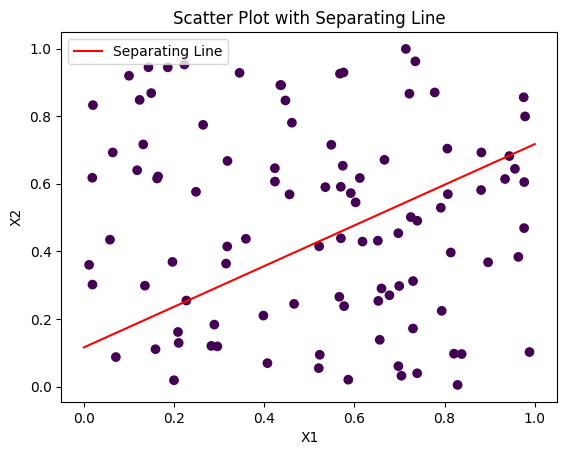

In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt

def nelder_mead(func, initial_simplex, tol=1e-7, max_iter=168):
    n = len(initial_simplex[0])
    alpha, beta, gamma = 1.0, 2, 0.5

    simplex = np.array(initial_simplex, dtype=float)
    for i in range(max_iter):
        f_values = [func(point) for point in simplex]
        best_idx = np.argmin(f_values)
        worst_idx = np.argmax(f_values)
        second_worst_idx = np.argsort(f_values)[-2]
        a = worst_idx
        best_point = simplex[best_idx]
        centroid = np.mean(simplex[:-1], axis=0)
        reflected_point = centroid + alpha * (centroid - simplex[worst_idx])
        if func(best_point) <= func(reflected_point) and func(reflected_point) < func(simplex[second_worst_idx]):
            simplex[worst_idx] = reflected_point
        elif func(reflected_point) < func(best_point):
            # Try expansion
            expanded_point = centroid + gamma * (reflected_point - centroid)
            if func(expanded_point) < func(reflected_point):
                simplex[worst_idx] = expanded_point
            else:
                simplex[worst_idx] = reflected_point
        else:
            if func(reflected_point) < func(simplex[worst_idx]):
                simplex[worst_idx] = reflected_point
            else:
                # Contract
                contracted_point = centroid + beta * (simplex[worst_idx] - centroid)
                if func(contracted_point) < func(simplex[worst_idx]):
                    simplex[worst_idx] = contracted_point
                else:
                    for i in range(len(simplex)):
                        if i != best_idx:
                            simplex[i] = 0.5 * (simplex[i] + best_point)

        if np.max(np.abs(simplex - simplex[best_idx])) < tol:
            break

    best_point = simplex[best_idx]
    best_value = func(best_point)
    return best_point, best_value


def objective_function3(w):
    lam = 1
    result = (
        0.5 * lam * (w[0] * w[0] + w[1] * w[1] + w[2] * w[2]) +
        math.log(1 + math.exp(-(w[0] + w[1] * 2.0 + w[2]))) +
        math.log(1 + math.exp(-(w[0] * 2.0 + w[1] * 4.0 + w[2]))) +
        math.log(1 + math.exp(-(w[0] * 2.5 + w[1] * 3.5 + w[2]))) +
        math.log(1 + math.exp(-(w[0] * 3.0 + w[1] * 1.5 + w[2]))) +
        math.log(1 + math.exp(-(w[0] * 3.5 + w[1] * 4.5 + w[2]))) +
        math.log(1 + math.exp((w[0] * 4 + w[1] * 1.5 + w[2]))) +
        math.log(1 + math.exp((w[0] * 4 + w[1] * 3.5 + w[2]))) +
        math.log(1 + math.exp((w[0] * 4.5 + w[1] * 2.5 + w[2]))) +
        math.log(1 + math.exp((w[0] * 5 + w[1] + w[2]))) +
        math.log(1 + math.exp((w[0] * 6 + w[1] * 2 + w[2]))) +
        math.log(1 + math.exp(-(w[0] * 6.5 + w[1] * 3 + w[2]))) +
        math.log(1 + math.exp((w[0] * 7 + w[1] * 1.5 + w[2])))
    )
    return result
def objective_function1(x):
  return x[0]**4+x[0]**2+x[1]**2
def  objective_function2(x):
  return 10*(x[1]-x[0]**2)+(1-x[0])**2

iterations = [1, 2,3,5,6,7,8,9,10,11,12,13,14,15, 30, 45, 60, 75, 90, 110, 135, 168,300,500]
initial_simplex1 =  [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1)]
initial_simplex = [(0,0),(1,0),(0,1)]
print(f"{'Loops':<10}{'Optimal Point':<40}{'Optimal Value':<20}")

# Loop over the specified iteration counts
for num_iterations in iterations:
    # Apply the nelder_mead function with the current number of iterations
    result_point2, result_value2 = nelder_mead(objective_function1, initial_simplex,tol=1e-7, max_iter=num_iterations)

    # Print the results in tabular format
    print(f"{num_iterations:<10}{str(result_point2):<40}{result_value2:<20}")
result_point2, result_value2 = nelder_mead(objective_function1,initial_simplex,tol=1e-7, max_iter=168)

# Create a table header
print(f"{'Loops':<10}{'Optimal Point':<40}{'Optimal Value':<20}")

# Loop over the specified iteration counts
for num_iterations in iterations:
    # Apply the nelder_mead function with the current number of iterations
    result_point1, result_value1 = nelder_mead(objective_function2, initial_simplex,tol=1e-7, max_iter=num_iterations)

    # Print the results in tabular format
    print(f"{num_iterations:<10}{str(result_point1):<40}{result_value1:<20}")
result_point1, result_value1 = nelder_mead(objective_function2,initial_simplex,tol=1e-7, max_iter=168)

print(f"{'Loops':<10}{'Optimal Point':<40}{'Optimal Value':<20}")

# Loop over the specified iteration counts
for num_iterations in iterations:
    # Apply the nelder_mead function with the current number of iterations
    result_point, result_value = nelder_mead(objective_function3, initial_simplex1,tol=1e-7, max_iter=num_iterations)

    # Print the results in tabular format
    print(f"{num_iterations:<10}{str(result_point):<40}{result_value:<20}")
result_point, result_value = nelder_mead(objective_function3,initial_simplex1,tol=1e-7, max_iter=168)

# Generate random points for plotting
np.random.seed(0)
x = np.random.rand(100, 2)
y = np.zeros(100)

# Define the separating line equation using the optimized parameters
w = result_point
slope = -w[0] / w[1]
intercept = -w[2] / w[1]
separating_line = lambda x: slope * x + intercept

# Create a scatter plot of the points
plt.scatter(x[:, 0], x[:, 1], c=y)

# Plot the separating line
x_line = np.linspace(0, 1, 100)
y_line = separating_line(x_line)
plt.plot(x_line, y_line, '-r', label='Separating Line')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Scatter Plot with Separating Line')
plt.show()
